## Exploratory Data Analysis & Feature selection

In [6]:
## import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style({'font.family':'serif','font.serif':'Times New Roman'})

In [8]:
plt.rcParams.update({'font.size':12})

In [9]:
## import the dataset
df=pd.read_excel('data1.xlsx')
df.tail(10)

,DOC,Salinity (ppt),SDR (cm),Water colour,Water level (cm),TSS (ml/L),Average PH,Average DO (ppm),Running aerator (HP),TDF (kg),ABW (gm),Water temperature (˚C),PH change,Ammonia (ppm),Water exchange (cm)
390,91,21,18,br,125,5.0,7.80,4.700000,928,540.0,NaN,29.70,0.2,NaN,4
391,92,21,17,br,124,6.0,7.65,5.150000,878,550.0,NaN,27.85,0.3,NaN,5
392,93,21,18,br,128,6.0,7.70,5.500000,858,515.0,NaN,27.35,0.2,0.080,2
393,94,22,22,br,131,6.5,7.85,5.250000,830,530.0,18.9,27.30,0.1,0.050,0
394,95,22,20,br,130,5.0,7.70,5.350000,842,460.0,NaN,28.10,0.0,0.045,0
395,96,22,18,br,126,6.0,7.70,4.776667,934,460.0,NaN,30.35,0.0,0.054,0
396,97,23,22,br,130,4.0,7.75,4.716667,1128,400.0,NaN,29.15,0.1,NaN,0
397,98,23,23,lgr,128,5.0,7.75,5.333333,922,410.0,NaN,27.70,0.1,NaN,0
398,99,23,24,lgr,125,6.0,7.70,4.850000,960,400.0,NaN,28.55,0.2,0.039,0
399,100,23,20,lgr,120,5.0,7.70,4.950000,126,400.0,19.5,28.85,0.0,0.054,0


In [10]:
data=pd.DataFrame(df.dtypes)
data=data.rename(columns={0:'DataType'})
data

,DataType
DOC,int64
Salinity (ppt),int64
SDR (cm),int64
Water colour,object
Water level (cm),int64
TSS (ml/L),float64
Average PH,float64
Average DO (ppm),float64
Running aerator (HP),int64
TDF (kg),float64


In [11]:
df['Water colour'].value_counts()

br     145
lgr     74
lbr     50
gr      41
yg      39
dgr     37
dbr     14
Name: Water colour, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
enc.fit(df['Water colour'])
df['Water colour']=enc.transform(df['Water colour'])
df

,DOC,Salinity (ppt),SDR (cm),Water colour,Water level (cm),TSS (ml/L),Average PH,Average DO (ppm),Running aerator (HP),TDF (kg),ABW (gm),Water temperature (˚C),PH change,Ammonia (ppm),Water exchange (cm)
0,1,16,50,4,120,1.0,8.25,5.783333,56,1.7,0.008,29.10,0.3,0.026,0
1,2,16,48,5,120,2.0,8.25,5.600000,31,2.4,NaN,28.65,0.1,0.028,0
2,3,16,55,4,132,0.5,8.05,5.333333,29,3.4,NaN,28.10,0.1,NaN,5
3,4,16,60,4,128,0.5,8.00,5.466667,44,4.2,NaN,28.40,0.0,0.018,0
4,5,16,45,4,126,0.5,8.00,5.433333,57,5.0,NaN,28.15,0.2,0.030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,96,22,18,0,126,6.0,7.70,4.776667,934,460.0,NaN,30.35,0.0,0.054,0
396,97,23,22,0,130,4.0,7.75,4.716667,1128,400.0,NaN,29.15,0.1,NaN,0
397,98,23,23,5,128,5.0,7.75,5.333333,922,410.0,NaN,27.70,0.1,NaN,0
398,99,23,24,5,125,6.0,7.70,4.850000,960,400.0,NaN,28.55,0.2,0.039,0


## Handling Missing value

In [13]:
df.isnull().sum()

DOC                         0
Salinity (ppt)              0
SDR (cm)                    0
Water colour                0
Water level (cm)            0
TSS (ml/L)                  0
Average PH                  0
Average DO (ppm)            0
Running aerator (HP)        0
TDF (kg)                    0
ABW (gm)                  343
Water temperature (˚C)      0
PH change                   0
Ammonia (ppm)             219
Water exchange (cm)         0
dtype: int64

<AxesSubplot:>

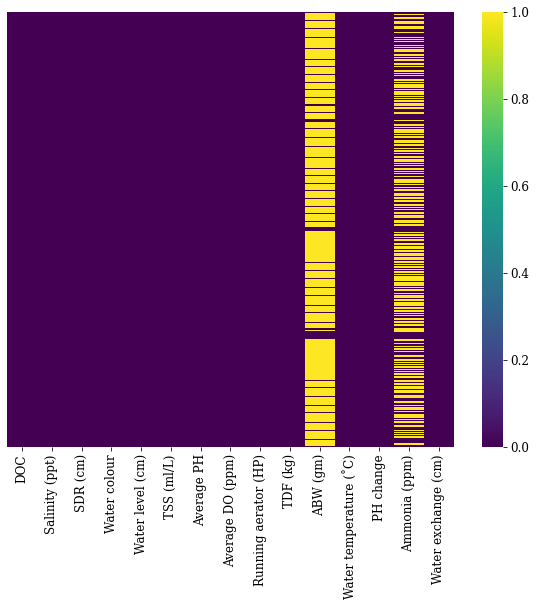

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap="viridis")

In [15]:
df=df.interpolate(method='linear', order=5)

<AxesSubplot:>

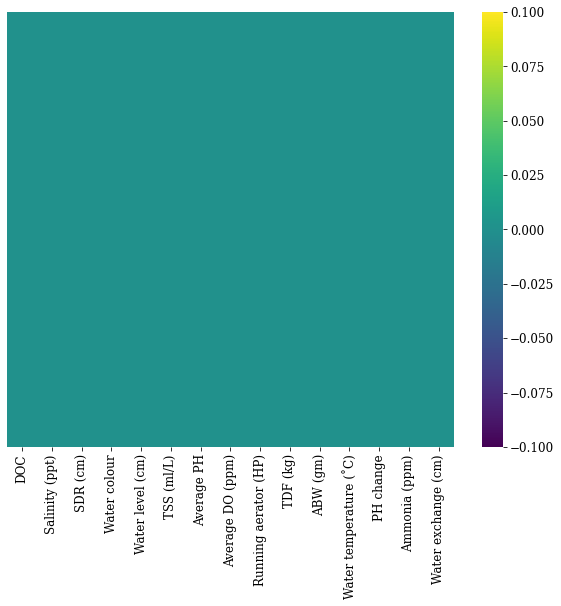

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap="viridis")

In [17]:
df.describe()

,DOC,Salinity (ppt),SDR (cm),Water colour,Water level (cm),TSS (ml/L),Average PH,Average DO (ppm),Running aerator (HP),TDF (kg),ABW (gm),Water temperature (˚C),PH change,Ammonia (ppm),Water exchange (cm)
count,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,50.50000,18.310000,24.630000,2.537500,128.142500,4.558750,7.839937,5.222921,421.025000,216.263750,9.631809,29.715813,0.164725,0.076820,2.205000
std,28.90222,4.781847,8.021156,2.244144,8.769804,3.428587,0.321191,0.630881,280.711563,179.005177,7.755254,1.080979,0.133219,0.074884,2.151639
min,1.00000,10.000000,10.000000,0.000000,100.000000,0.000000,7.100000,4.200000,29.000000,1.700000,0.007000,27.200000,0.000000,0.010000,0.000000
25%,25.75000,14.750000,20.000000,0.000000,122.000000,1.950000,7.650000,4.750000,193.750000,85.150000,2.041952,29.150000,0.100000,0.038458,0.000000
50%,50.50000,19.000000,23.000000,3.000000,129.000000,4.000000,7.800000,5.133333,353.000000,155.000000,8.575000,29.725000,0.100000,0.054500,2.000000
75%,75.25000,21.000000,28.000000,5.000000,134.000000,6.500000,8.050000,5.550000,614.000000,392.500000,16.857143,30.462500,0.200000,0.080000,4.000000
max,100.00000,28.000000,60.000000,6.000000,154.000000,15.000000,8.800000,7.350000,1269.000000,630.000000,25.500000,31.650000,0.600000,0.500000,10.000000


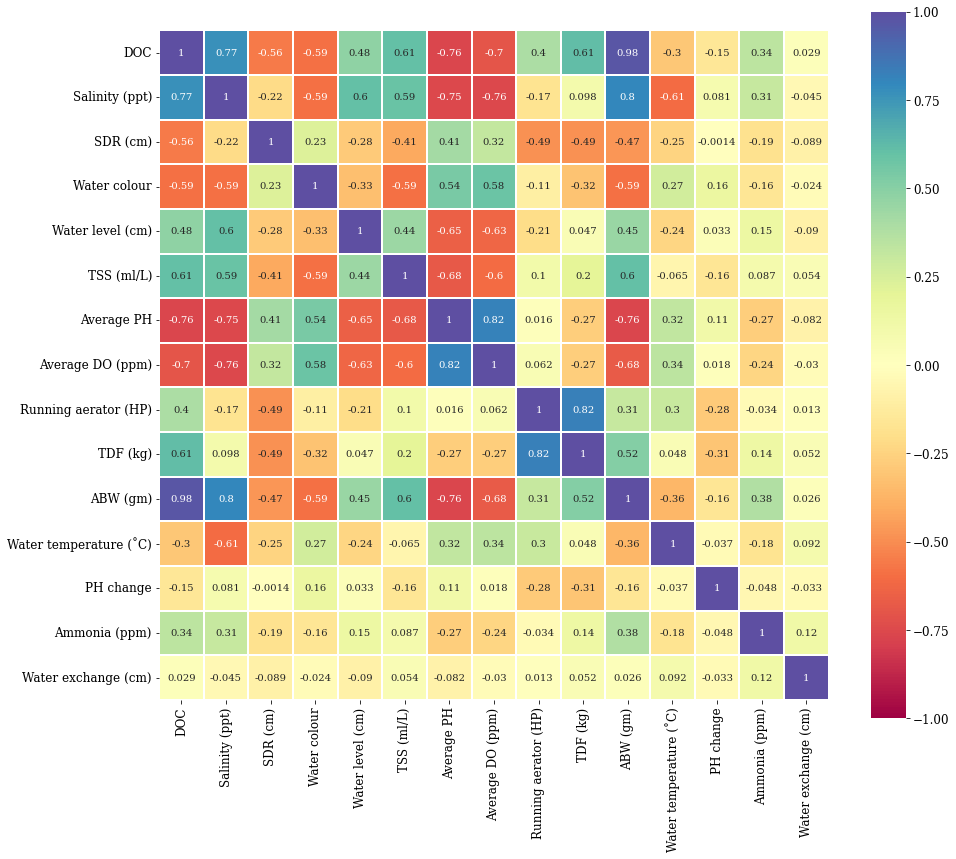

In [18]:
#correlation metrix
corr=df.corr()
plt.figure(figsize=(15, 13))

sns.heatmap(corr[(corr>=0) | (corr<=-0)], cmap='Spectral', vmax=1.0, vmin=-1, linewidths=0.1, annot=True, annot_kws={"size":10},square=True);


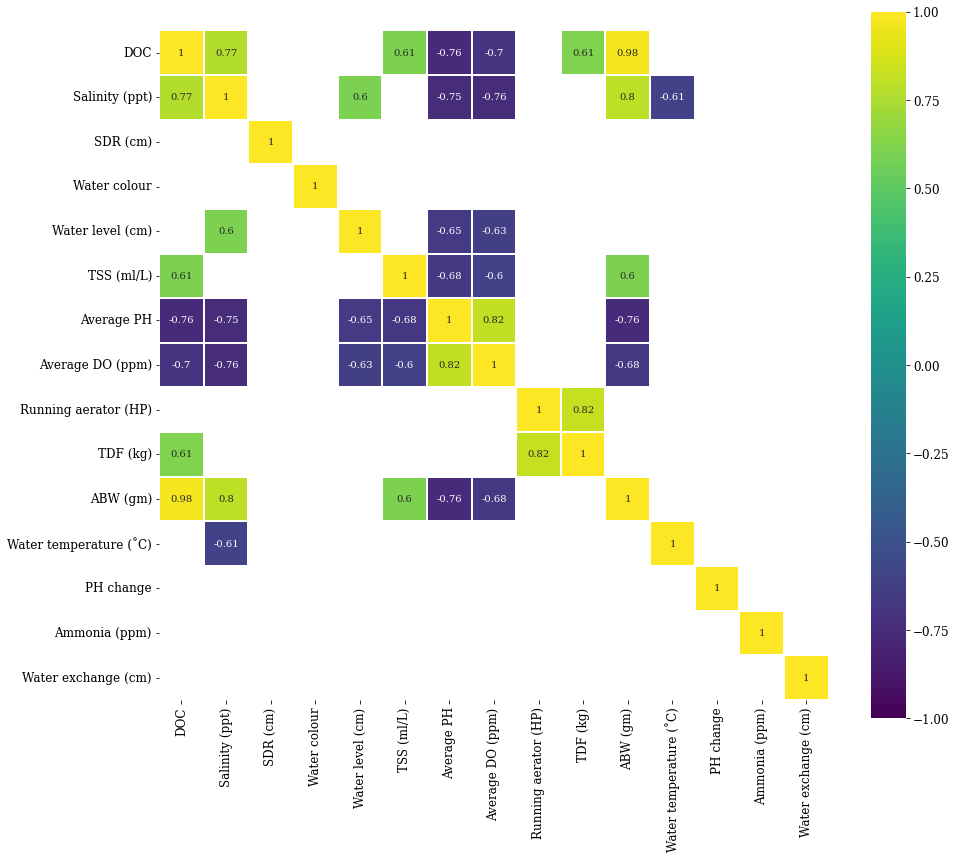

In [19]:
corr=df.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(corr[(corr>=0.6) | (corr<=-0.6)], cmap='viridis', vmax=1.0, vmin=-1, linewidths=0.1, annot=True, annot_kws={"size":10},square=True);

Text(0.5, 1.0, 'Average Body Weight v Salinity')

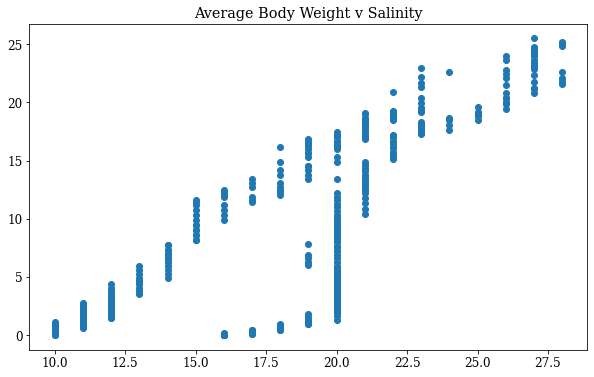

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x='Salinity (ppt)', y='ABW (gm)', data=df)
plt.title('Average Body Weight v Salinity')

Text(0.5, 1.0, 'Average Body Weight vs Days of Culture')

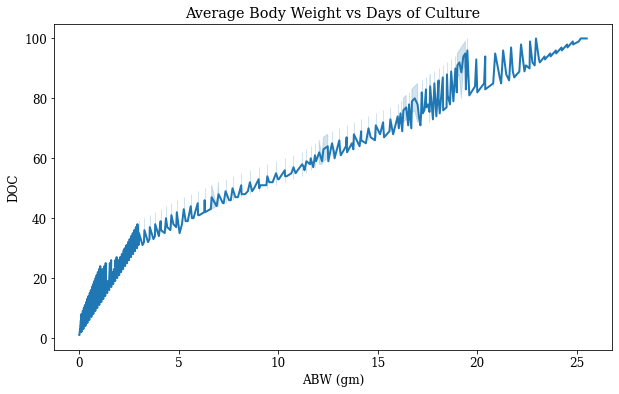

In [17]:
plt.figure(figsize=(10,6))
sns.lineplot(x='ABW (gm)', y='DOC', data=df, linewidth=2)
plt.title('Average Body Weight vs Days of Culture')

Text(0.5, 1.0, 'Salinity vs Average DO')

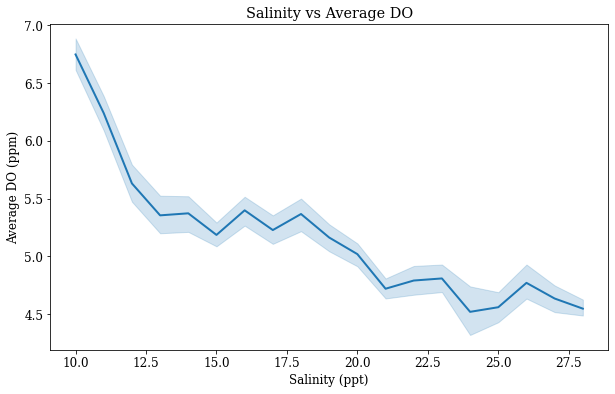

In [18]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Salinity (ppt)',y='Average DO (ppm)', data=df, linewidth=2)
plt.title('Salinity vs Average DO')

Text(0.5, 1.0, 'Total Suspended Solids vs Average PH')

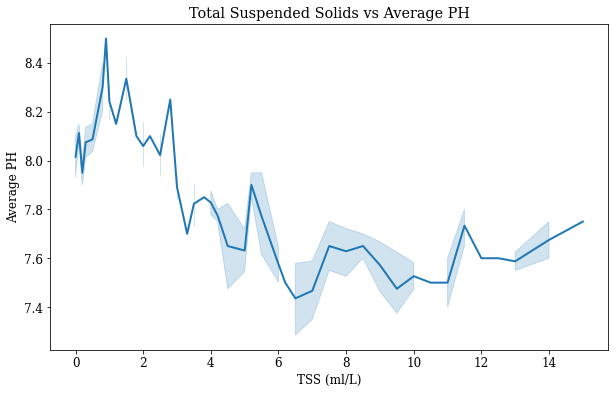

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x='TSS (ml/L)',y='Average PH', data=df, linewidth=2)
plt.title('Total Suspended Solids vs Average PH')

Text(0.5, 1.0, 'Water Temperature vs Total Suspended Solids')

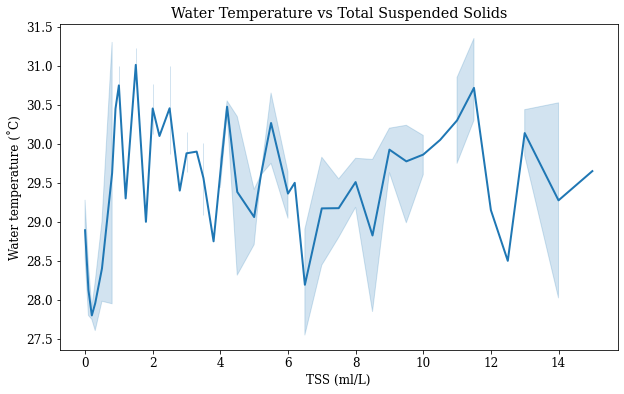

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='TSS (ml/L)',y='Water temperature (˚C)', data=df, linewidth=2)
plt.title('Water Temperature vs Total Suspended Solids')

Text(0.5, 1.0, 'Water Temperature vs Total Daily Feed')

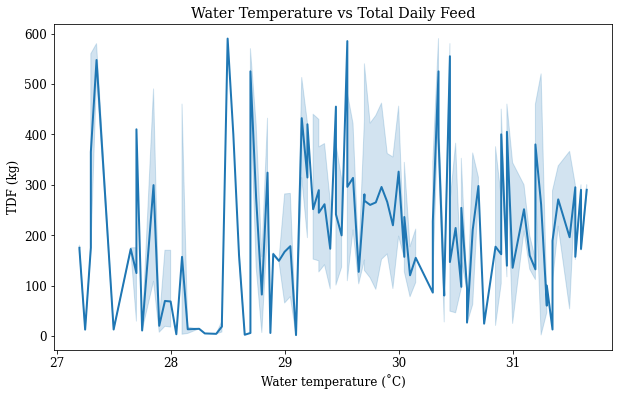

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Water temperature (˚C)',y='TDF (kg)', data=df, linewidth=2)
plt.title('Water Temperature vs Total Daily Feed')

Text(0.5, 1.0, 'Average Body Weight vs Water Temperature')

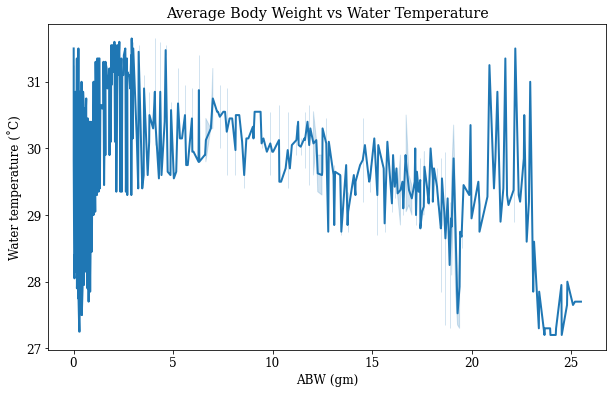

In [22]:
plt.figure(figsize=(10,6))
sns.lineplot(x='ABW (gm)',y='Water temperature (˚C)', data=df, linewidth=2)
plt.title('Average Body Weight vs Water Temperature')

Text(0.5, 1.0, 'Salinity vs Water Temperature')

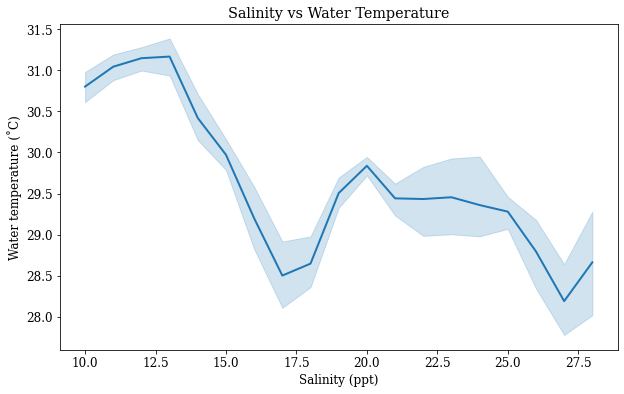

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Salinity (ppt)',y='Water temperature (˚C)', data=df, linewidth=2)
plt.title('Salinity vs Water Temperature')

Text(0.5, 1.0, 'Average Body Weight vs Salinity')

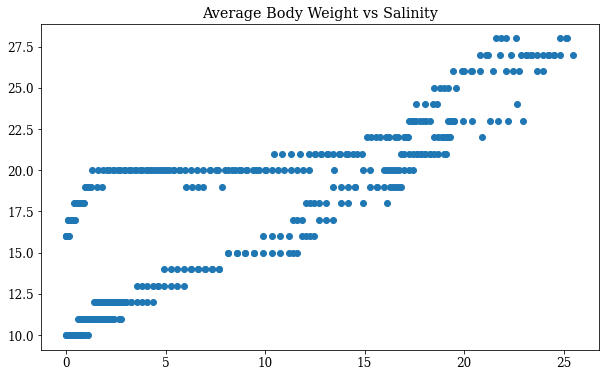

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(x='ABW (gm)',y='Salinity (ppt)', data=df)
plt.title('Average Body Weight vs Salinity')

Text(0.5, 1.0, 'Average Body Weight vs Total suspended Solids')

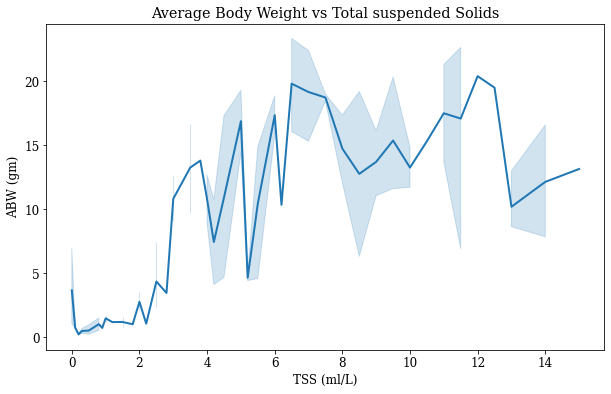

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x='TSS (ml/L)',y='ABW (gm)', data=df, linewidth=2)
plt.title('Average Body Weight vs Total suspended Solids')

Text(0.5, 1.0, 'Average Body Weight vs Average PH')

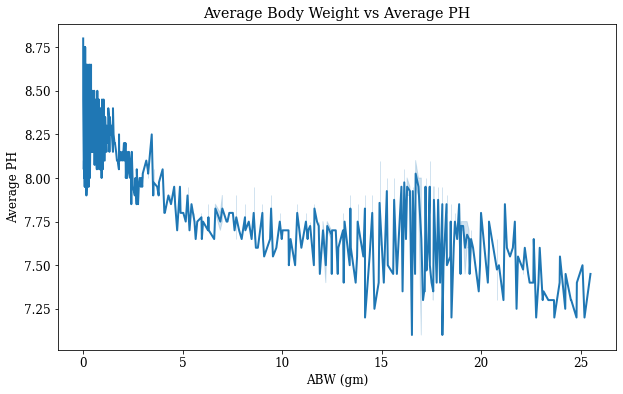

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(x='ABW (gm)',y='Average PH', data=df, linewidth=2)
plt.title('Average Body Weight vs Average PH')

Text(0.5, 1.0, 'Average Body Weight vs Average DO')

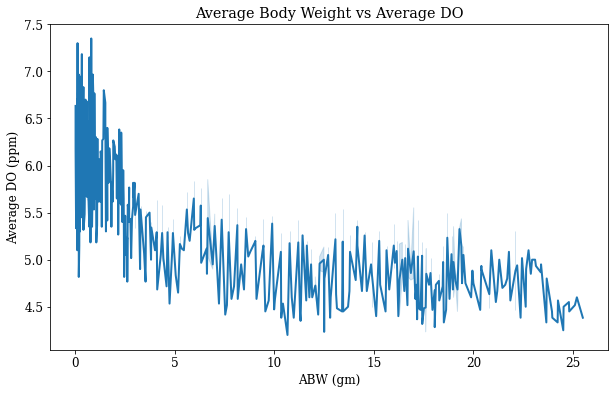

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(x='ABW (gm)',y='Average DO (ppm)', data=df, linewidth=2)
plt.title('Average Body Weight vs Average DO')

Text(0.5, 1.0, 'Total Suspended Solids vs Average DO')

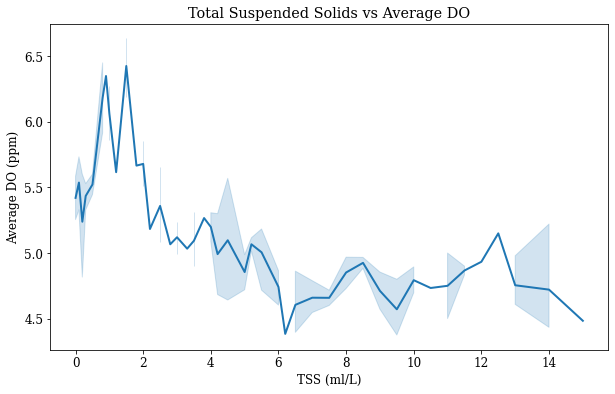

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x='TSS (ml/L)',y='Average DO (ppm)', data=df, linewidth=2)
plt.title('Total Suspended Solids vs Average DO')

Text(0.5, 1.0, 'Total Suspended Solids vs Running Aerator')

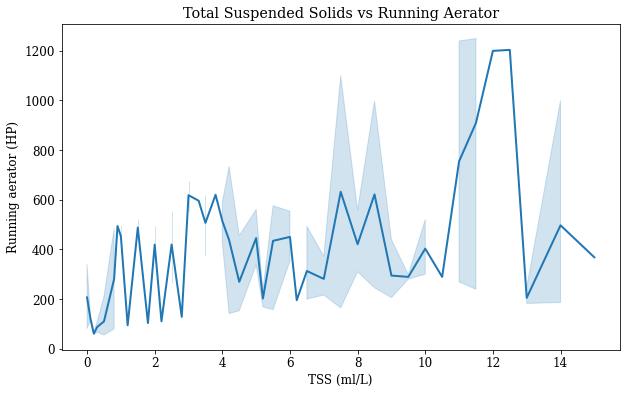

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x='TSS (ml/L)',y='Running aerator (HP)', data=df, linewidth=2)
plt.title('Total Suspended Solids vs Running Aerator')

Text(0.5, 1.0, 'Average PH vs Average DO')

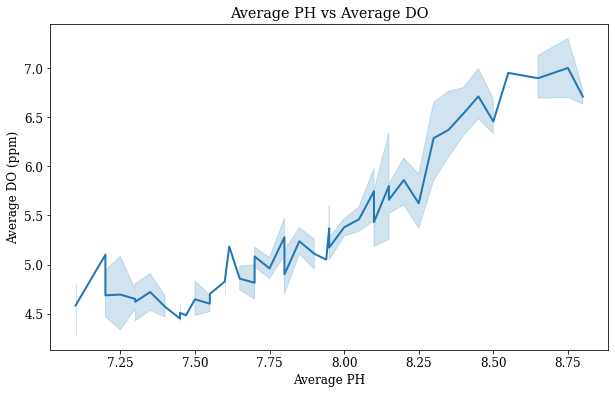

In [30]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Average PH',y='Average DO (ppm)', data=df, linewidth=2)
plt.title('Average PH vs Average DO')

Text(0.5, 1.0, 'Total daily feed vs Ammonia')

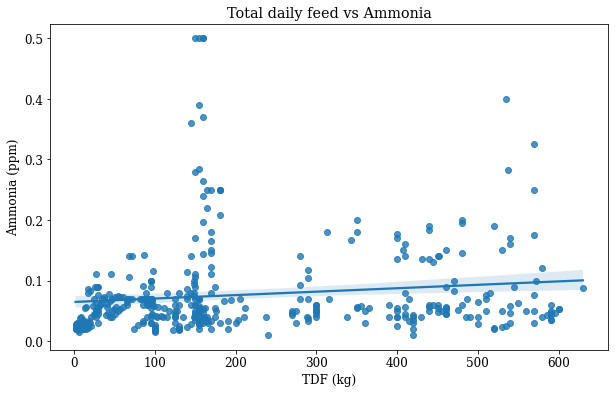

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x='TDF (kg)',y='Ammonia (ppm)', data=df)
plt.title('Total daily feed vs Ammonia')

<Figure size 720x576 with 0 Axes>

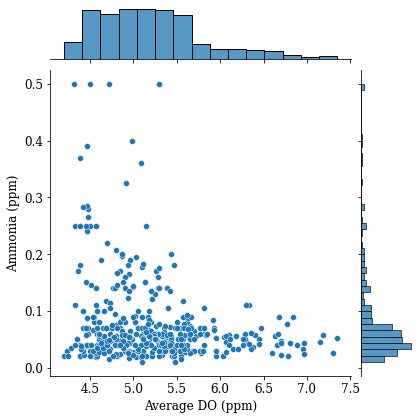

In [35]:
plt.figure(figsize=(10, 8))

sns.jointplot(x='Average DO (ppm)',y='Ammonia (ppm)', data=df)


Text(0.5, 1.0, 'Water Exchange vs Ammonia')

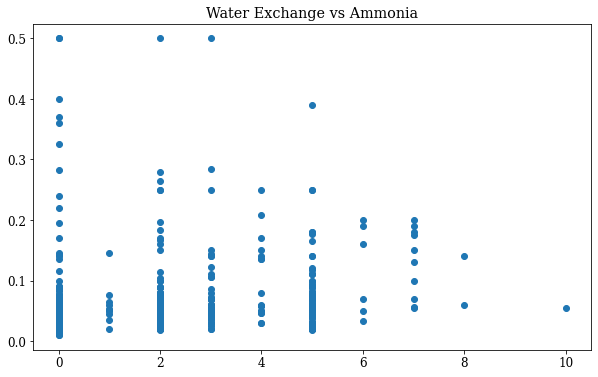

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(x='Water exchange (cm)',y='Ammonia (ppm)', data=df)
plt.title('Water Exchange vs Ammonia')

Text(0.5, 1.0, 'Average Body Weight vs Ammonia')

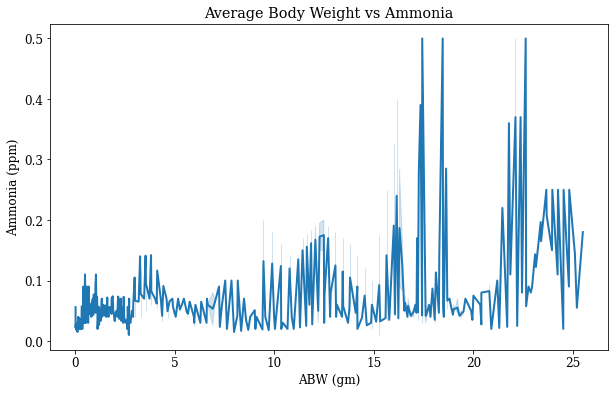

In [37]:
plt.figure(figsize=(10,6))
sns.lineplot(x='ABW (gm)',y='Ammonia (ppm)', data=df, linewidth=2)
plt.title('Average Body Weight vs Ammonia')

Text(0.5, 1.0, 'Salinity vs Days of Culture')

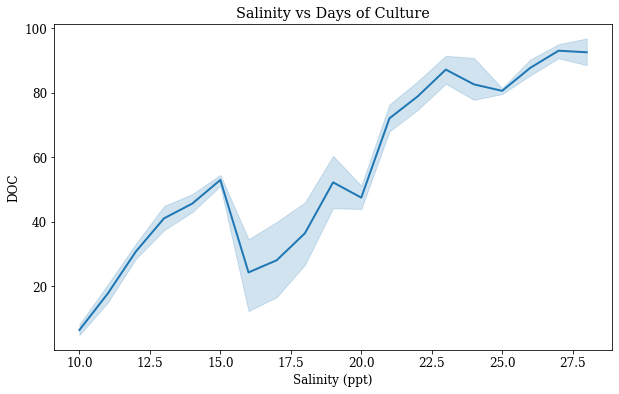

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Salinity (ppt)',y='DOC', data=df, linewidth=2)
plt.title('Salinity vs Days of Culture')

Text(0.5, 1.0, 'Running Aerator vs Total Suspended solids')

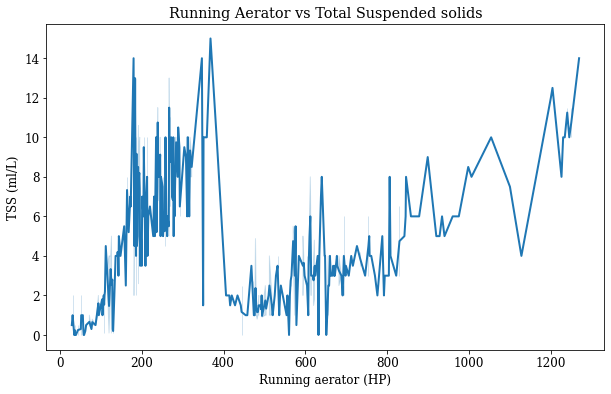

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Running aerator (HP)',y='TSS (ml/L)', data=df, linewidth=2)
plt.title('Running Aerator vs Total Suspended solids')

In [21]:
x=df.drop(columns=['ABW (gm)'],axis=1)
x

,DOC,Salinity (ppt),SDR (cm),Water colour,Water level (cm),TSS (ml/L),Average PH,Average DO (ppm),Running aerator (HP),TDF (kg),Water temperature (˚C),PH change,Ammonia (ppm),Water exchange (cm)
0,1,16,50,4,120,1.0,8.25,5.783333,56,1.7,29.10,0.3,0.026,0
1,2,16,48,5,120,2.0,8.25,5.600000,31,2.4,28.65,0.1,0.028,0
2,3,16,55,4,132,0.5,8.05,5.333333,29,3.4,28.10,0.1,0.023,5
3,4,16,60,4,128,0.5,8.00,5.466667,44,4.2,28.40,0.0,0.018,0
4,5,16,45,4,126,0.5,8.00,5.433333,57,5.0,28.15,0.2,0.030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,96,22,18,0,126,6.0,7.70,4.776667,934,460.0,30.35,0.0,0.054,0
396,97,23,22,0,130,4.0,7.75,4.716667,1128,400.0,29.15,0.1,0.049,0
397,98,23,23,5,128,5.0,7.75,5.333333,922,410.0,27.70,0.1,0.044,0
398,99,23,24,5,125,6.0,7.70,4.850000,960,400.0,28.55,0.2,0.039,0


In [22]:
y=df['ABW (gm)']
y

0       0.008000
1       0.022571
2       0.037143
3       0.051714
4       0.066286
         ...    
395    19.100000
396    19.200000
397    19.300000
398    19.400000
399    19.500000
Name: ABW (gm), Length: 400, dtype: float64

## Feature selection 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

## Mutual Information 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [29]:
top_col=SelectKBest(mutual_info_regression,k=5)
model=top_col.fit(x, y)
x.columns[top_col.get_support()]

Index(['DOC', 'Salinity (ppt)', 'Average PH', 'Running aerator (HP)',
       'TDF (kg)'],
      dtype='object')

In [27]:
dfscore=pd.DataFrame(model.scores_)
dfcolumn=pd.DataFrame(x.columns)
featurescore=pd.concat([dfcolumn,dfscore], axis=1)
featurescore.columns=['Parameters','Score']
featurescore

,Parameters,Score
0,DOC,2.204272
1,Salinity (ppt),1.454476
2,SDR (cm),0.506873
3,Water colour,0.646651
4,Water level (cm),0.351704
5,TSS (ml/L),0.768538
6,Average PH,0.935829
7,Average DO (ppm),0.536039
8,Running aerator (HP),1.206634
9,TDF (kg),1.619023


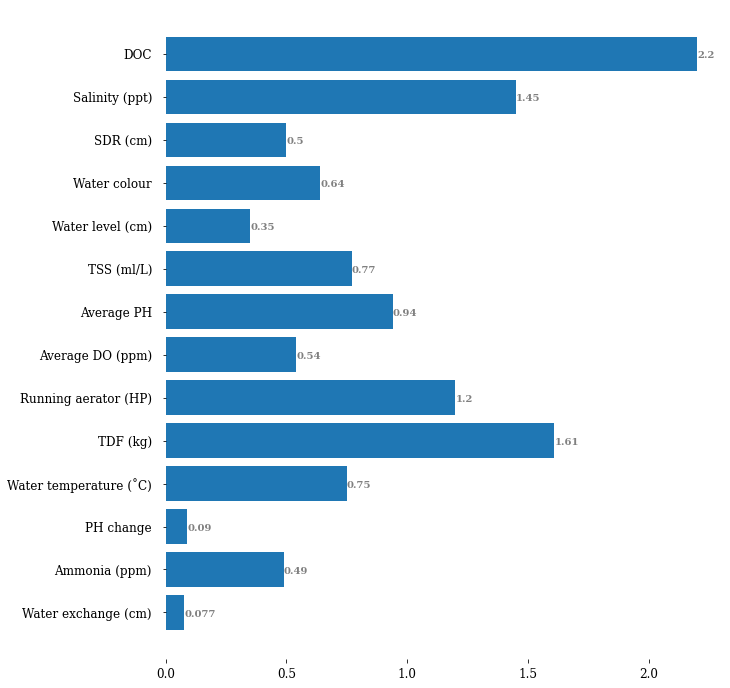

In [31]:
data={'DOC':2.20,'Salinity (ppt)':1.45,'SDR (cm)':0.50,
      'Water colour':0.64,'Water level (cm)':0.35,'TSS (ml/L)':0.77,
      'Average PH':0.94,'Average DO (ppm)':0.54,'Running aerator (HP)':1.20,
      'TDF (kg)':1.61,
      'Water temperature (˚C)':0.75,
      'PH change':0.09, 'Ammonia (ppm)':0.49,
'Water exchange (cm)':0.077}
features=list(data.keys())
scores=list(data.values())
fig,ax=plt.subplots(figsize=(10,12))
ax.barh(features, scores)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_tick_params(pad =5)
ax.yaxis.set_tick_params(pad =10)


ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()),3)), fontsize=10,fontweight='bold',color='grey')

plt.show()

## Spearman's Rank Correlation Coefficient method

In [53]:

from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

seed(1)
out=df['ABW (gm)']
d1=df['DOC']
d2=df['Salinity (ppt)']
d3=df['SDR (cm)']
d4=df['Water colour']
d5=df['Water level (cm)']
d6=df['TSS (ml/L)']
d7=df['Average PH']
d8=df['Average DO (ppm)']
d9=df['Running aerator (HP)']
d10=df['Water temperature (˚C)']
d11=df['TDF (kg)']
d12=df['PH change']
d13=df['Ammonia (ppm)']
d14=df['Water exchange (cm)']

corr0,_=spearmanr(d1,out)
corr1,_=spearmanr(d2,out)
corr2,_=spearmanr(d3,out)
corr3,_=spearmanr(d4,out)
corr4,_=spearmanr(d5,out)
corr5,_=spearmanr(d6,out)
corr6,_=spearmanr(d7,out)
corr7,_=spearmanr(d8,out)
corr8,_=spearmanr(d9,out)
corr9,_=spearmanr(d10,out)
corr10,_=spearmanr(d11,out)
corr11,_=spearmanr(d12,out)
corr12,_=spearmanr(d13,out)
corr13,_=spearmanr(d14,out)

In [54]:
print('Spearmans correlation of DOC : %.3F' % corr0)
print('Spearmans correlation of Salinity : %.3F' % corr1)
print('Spearmans correlation of SDR(cm) : %.3F' % corr2)
print('Spearmans correlation of Water colour: %.3F' % corr3)
print('Spearmans correlation of Water level(cm) : %.3F' % corr4)
print('Spearmans correlation of TSS(ml/L) : %.3F' % corr5)
print('Spearmans correlation of Average PH : %.3F' % corr6)
print('Spearmans correlation of Average DO(ppm) : %.3F' % corr7)
print('Spearmans correlation of Running aerator(HP) : %.3F' % corr8)
print('Spearmans correlation of Water temperature(˚C) : %.3F' % corr9)
print('Spearmans correlation of TDF (kg) : %.3F' % corr10)
print('Spearmans correlation of PH change : %.3F' % corr11)
print('Spearmans correlation of Ammonia (ppm) : %.3F' % corr12)
print('Spearmans correlation of Water exchange(cm) : %.3F' % corr13)

Spearmans correlation of DOC : 0.990
Spearmans correlation of Salinity : 0.806
Spearmans correlation of SDR(cm) : -0.519
Spearmans correlation of Water colour: -0.583
Spearmans correlation of Water level(cm) : 0.479
Spearmans correlation of TSS(ml/L) : 0.727
Spearmans correlation of Average PH : -0.799
Spearmans correlation of Average DO(ppm) : -0.723
Spearmans correlation of Running aerator(HP) : 0.359
Spearmans correlation of Water temperature(˚C) : -0.298
Spearmans correlation of TDF (kg) : 0.673
Spearmans correlation of PH change : -0.142
Spearmans correlation of Ammonia (ppm) : 0.322
Spearmans correlation of Water exchange(cm) : 0.044


## Pairplot

<Figure size 720x432 with 0 Axes>

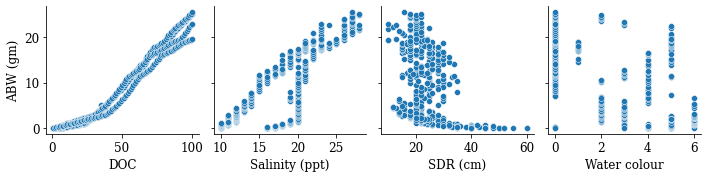

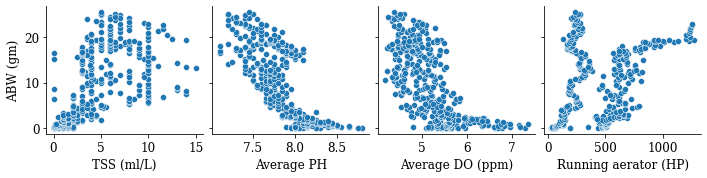

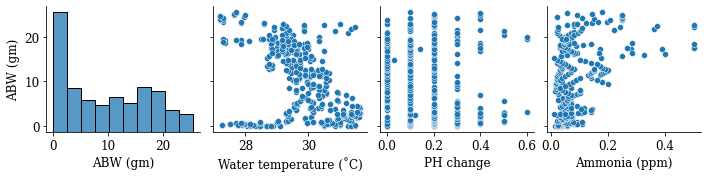

In [56]:
plt.figure(figsize=(10,6)) 

for i in range(0, len(df.columns),5):
    sns.pairplot(data=df,x_vars=df.columns[i:i+4], y_vars=['ABW (gm)'])


In [13]:
df.to_excel('ABW.xlsx', index=False)